This notebook roughly follows [Detecting opinion spams and fake news ... (2017)](https://www.researchgate.net/publication/322128415_Detecting_opinion_spams_and_fake_news_using_text_classification) by copy-pasting some code from CodeBasic's [videos](https://www.youtube.com/playlist?list=PLeo1K3hjS3uuvuAXhYjV2lMEShq2UYSwX) and [notebooks](https://github.com/codebasics/nlp-tutorials/blob/main/11_bag_of_n_grams/10_bag_of_n_grams.ipynb).

<div style="color:red;">Please download the Kaggle dataset and LIAR dataset first.</div>

# Import the python libraries

In [1]:
# importing libraries being used in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in datasets

In [2]:
# The dataset is the Fake News dataset, which is a dataset of news articles.
news_df = pd.read_csv('./Datasets/fake-news/train.csv',index_col=0)
news_df.head()

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \r\nAn Iranian woman has been sentenced ...,1


# Extracting grammatical error 

We are goint to use some of the packages listed here: https://blog.sapling.ai/python-spelling-and-grammar-checkers/ 

In [3]:
# Using python packages to the number of grammar errors in each statement
# The first package is LanguageTool, which is a grammar checker for English, German, Polish, Dutch, Romanian, and a lot more languages.
# The second package is Sapling, which is a grammar checker for English.
# Both packages are free to use, but they have a limit of 1000 requests per day.
# The code below is an example of how to use the packages to check the grammar of a statement.
from language_tool_python import LanguageTool
tool = LanguageTool('en-US')

Unzipping C:\Users\User\AppData\Local\Temp\tmpshhf3sxa.zip to C:\Users\User\.cache\language_tool_python.
Downloaded https://www.languagetool.org/download/LanguageTool-5.7.zip to C:\Users\User\.cache\language_tool_python.


In [4]:
news_df['Grammar Errors'] = news_df['text'].apply(lambda x: len(tool.check(x)))
news_df.head()

,title,author,text,label,Grammar Errors
id,,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,43
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,22
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,16
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,18
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \r\nAn Iranian woman has been sentenced ...,1,8


In [5]:
# export the dataset to a csv file for future use
news_df.to_csv('./Datasets/fake-news/train_with_grammar.csv')

In [11]:
# check NaN values in news_df dataset
news_df.isnull().sum()

title              558
author            1957
text                39
label                0
Grammar Errors       0
dtype: int64

In [12]:
# drop NaN values in text column from news_df dataset
news_df.dropna(subset=['text'], inplace=True)

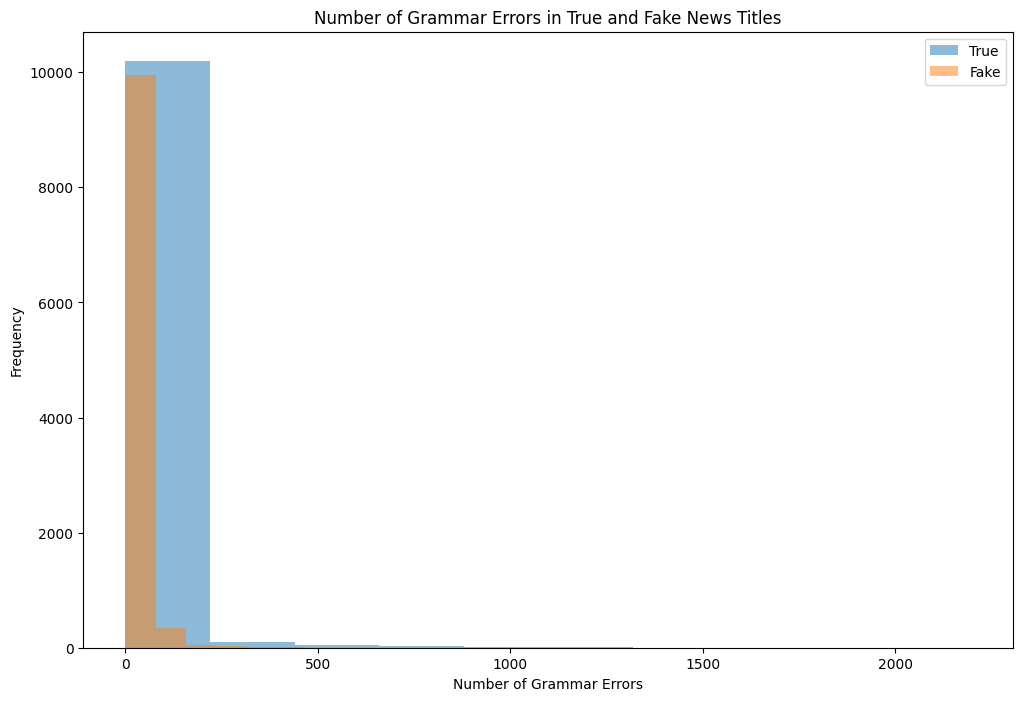

In [13]:
# Plotting the number of grammar errors in for each different label:
plt.figure(figsize=(12,8))
plt.hist(news_df[news_df['label'] == 1]['Grammar Errors'], bins=10, alpha=0.5, label='True')
plt.hist(news_df[news_df['label'] == 0]['Grammar Errors'], bins=10, alpha=0.5, label='Fake')
plt.legend(loc='upper right')
plt.title('Number of Grammar Errors in True and Fake News Titles')
plt.xlabel('Number of Grammar Errors')
plt.ylabel('Frequency')
plt.show()